In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lib_FRIDA_data import *

In [12]:
expID='EMB_26May_nS10000'
path='/home/lennart/Arbeit/2_WorldTrans/work/FRIDA_plots/'

SLR_total, time_FRIDA = readFromFridaOutput('SLR', expID=expID, path=path, lmedian=True)
SLR_thermo, time_FRIDA = readFromFridaOutput('SLR_thermo', expID=expID, path=path, lmedian=True)
SLR_MG, time_FRIDA = readFromFridaOutput('SLR_MG', expID=expID, path=path, lmedian=True)
SLR_GIS, time_FRIDA = readFromFridaOutput('SLR_GIS', expID=expID, path=path, lmedian=True)
SLR_AIS, time_FRIDA = readFromFridaOutput('SLR_AIS', expID=expID, path=path, lmedian=True)
hydrowater, time_FRIDA = readFromFridaOutput('Hydrowater', expID=expID, path=path, lmedian=True)
Groundwater, time_FRIDA = readFromFridaOutput('Groundwater', expID=expID, path=path, lmedian=True)



#df_subset = df.iloc[:, :45]

# Transpose the DataFrame.
#df_transposed = df_subset.T

# Do something with df_transposed; for example, print it.
#print(df_transposed)

Loading variable: SLR
Loading variable: SLR_thermo
Loading variable: SLR_MG
Loading variable: SLR_GIS
Loading variable: SLR_AIS
Loading variable: Hydrowater
Loading variable: Groundwater


In [18]:
df = pd.read_csv('Calibration Data.csv')

SLR_total_ref = df.values[116,14:38]
SLR_thermo_ref = df.values[111,14:38]
SLR_MG_ref = df.values[112,14:38]
SLR_GIS_ref = df.values[113,14:38]
SLR_AIS_ref = df.values[114,14:38]
SLR_LWS_ref = df.values[115,14:38]
SLR_ref_time= np.linspace(1993,2016,24)

hydrowater_ref = np.asarray([5300000000000, 6350000000000])
hydrowater_ref_time = np.asarray([2000, 2018])

In [19]:
SLR_to_MioKm3 = 1.0/(2.77)
SLR_to_Km3 = 1.0e6/(2.77)

#Ocean_anomaly = ((SLR_total - SLR_thermo) - (SLR_total[0] - SLR_thermo[0])) * SLR_to_MioKm3
#MG_anomaly = -SLR_to_MioKm3*(SLR_MG - SLR_MG[0])
#GIS_anomaly = -SLR_to_MioKm3*(SLR_GIS - SLR_GIS[0])
#AIS_anomaly = -SLR_to_MioKm3*(SLR_AIS - SLR_AIS[0])
#hydrowater_anomaly = (hydrowater - hydrowater[0])*1e-15
#groundwater_anomaly = (Groundwater - Groundwater[0])*1e-15

Ocean_anomaly = ((SLR_total[1:] - SLR_thermo[1:]) - (SLR_total[:-1] - SLR_thermo[:-1])) * SLR_to_Km3
MG_anomaly = -SLR_to_Km3*(SLR_MG[1:] - SLR_MG[:-1])
GIS_anomaly = -SLR_to_Km3*(SLR_GIS[1:] - SLR_GIS[:-1])
AIS_anomaly = -SLR_to_Km3*(SLR_AIS[1:] - SLR_AIS[:-1])
hydrowater_anomaly = (hydrowater[1:] - hydrowater[:-1])*1e-9
groundwater_anomaly = (Groundwater[1:] - Groundwater[:-1])*1e-9

Ocean_ref_anomaly = ((SLR_total_ref[1:] - SLR_thermo_ref[1:]) - (SLR_total_ref[:-1] - SLR_thermo_ref[:-1])) * SLR_to_Km3
MG_ref_anomaly = -SLR_to_Km3*(SLR_MG_ref[1:] - SLR_MG_ref[:-1])
GIS_ref_anomaly = -SLR_to_Km3*(SLR_GIS_ref[1:] - SLR_GIS_ref[:-1])
AIS_ref_anomaly = -SLR_to_Km3*(SLR_AIS_ref[1:] - SLR_AIS_ref[:-1])
SLR_ref_anomaly_time = (SLR_ref_time[1:]+SLR_ref_time[:-1])/2.0

hydrowater_ref_anomaly = (hydrowater_ref[1:] - hydrowater_ref[:-1])*1e-9 / 18.0
hydrowater_ref_anomaly_time = np.asarray([2009])



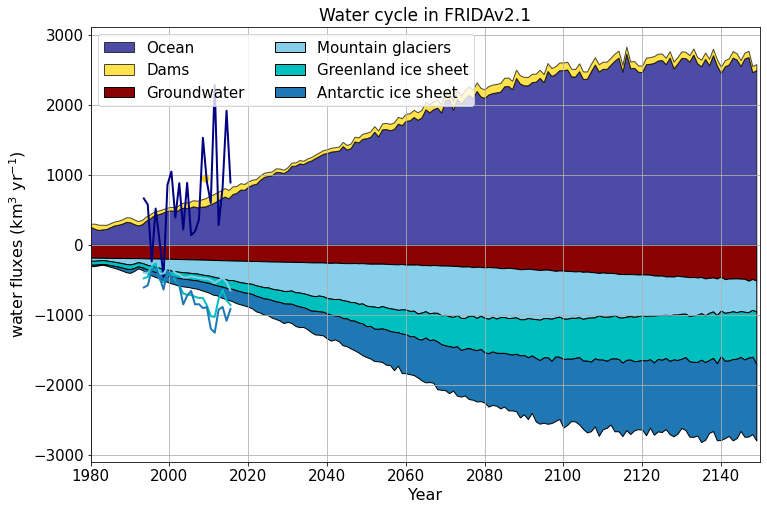

In [29]:
font=15
plt.figure(figsize=(12,8), facecolor='white')
plt.rcParams.update({'font.size': font})
plt.rc('xtick', labelsize=font)
plt.rc('ytick', labelsize=font)

# GCB data
ax=plt.gca()



ax.stackplot(time_FRIDA[:-1],  Ocean_anomaly, hydrowater_anomaly, labels=['Ocean', 'Dams'], colors=['navy', 'gold'], alpha=0.7, edgecolor='k')
ax.stackplot(time_FRIDA[:-1], groundwater_anomaly, MG_anomaly, GIS_anomaly, AIS_anomaly,
             labels=['Groundwater', 'Mountain glaciers', 'Greenland ice sheet', 'Antarctic ice sheet'],
             colors=['darkred', 'skyblue', 'c', 'tab:blue'], edgecolor='k', alpha=1.0)


ax.plot(SLR_ref_anomaly_time, Ocean_ref_anomaly, color='navy', linewidth=2)
ax.scatter(hydrowater_ref_anomaly_time, Ocean_ref_anomaly[16]+hydrowater_ref_anomaly, color='gold', s=50)
        
        
ax.plot(SLR_ref_anomaly_time, MG_ref_anomaly+groundwater_anomaly[14:37], color='skyblue', linewidth=2)
ax.plot(SLR_ref_anomaly_time, GIS_ref_anomaly+MG_ref_anomaly+groundwater_anomaly[14:37], color='c', linewidth=2)
ax.plot(SLR_ref_anomaly_time, AIS_ref_anomaly+GIS_ref_anomaly+MG_ref_anomaly+groundwater_anomaly[14:37], color='tab:blue', linewidth=2)


# Adding labels and legend
ax.set_xlabel('Year', fontsize=font+1)
ax.set_ylabel('water fluxes (km$^3$ yr$^{-1}$)', fontsize=font+1)
ax.set_title(r'Water cycle in FRIDAv2.1', fontsize=font+2)
ax.set_xlim(1980,2150)
#ax.set_ylim(-25,30)

ax.grid()
ax.legend(ncol=2, loc='upper left')

# Show plot
plt.subplots_adjust(wspace=0.1)
plt.savefig('FRIDA_EMBv2.1_water_cycle.png')